# Calibration of the model

In [1]:
import matplotlib.pyplot as plt
import sys
import hickle
from pathlib import Path
import numpy as np
from formable.utils import read_non_uniform_csv
from formable.tensile_test import TensileTest
from tensile_test import read_tensile_test_CSV
from matflow import load_workflow
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

## 1. Check Tensile Test Data

### Defining parameters to be read: true stress and true strain

In [2]:
true_strain_col_index= 2 # 0 is left most column
true_stress_col_index= 3 
eng_strain_col_index = None
eng_stress_col_index = None
stress_units="PA" # MPA or GPA
CSV_arguments = {"delimiter":',',"skip_rows":1,"header_row":0}

### Reading data from the paths

In [3]:
## Path:
CSV_file_path = (r"C:\Users\Laura\Dropbox (The University of Manchester)\Mini-project\Experiments\Data\Novelis"
                 "\Tensile_test\Data organised for Matflow\Tensile_test_AlloyA.csv")
## Data:
TensileTest_data_A = read_tensile_test_CSV(CSV_file_path,CSV_arguments,eng_strain_col_index,eng_stress_col_index,
                                           true_stress_col_index,true_strain_col_index,stress_units)
## Path:
CSV_file_path = (r"C:\Users\Laura\Dropbox (The University of Manchester)\Mini-project\Experiments\Data\Novelis"
                 "\Tensile_test\Data organised for Matflow\Tensile_test_AlloyB.csv")
## Data:
TensileTest_data_B = read_tensile_test_CSV(CSV_file_path,CSV_arguments,eng_strain_col_index,eng_stress_col_index,
                                           true_stress_col_index,true_strain_col_index,stress_units)
## Path:
CSV_file_path = (r"C:\Users\Laura\Dropbox (The University of Manchester)\Mini-project\Experiments\Data\Novelis"
                 "\Tensile_test\Data organised for Matflow\Tensile_test_AlloyC.csv")
## Data:
TensileTest_data_C = read_tensile_test_CSV(CSV_file_path,CSV_arguments,eng_strain_col_index,eng_stress_col_index,
                                           true_stress_col_index,true_strain_col_index,stress_units)

### Extracting the columns needed

In [4]:
exp_true_strainA=TensileTest_data_A['true_strain']
exp_true_stressA=TensileTest_data_A['true_stress']

exp_true_strainB=TensileTest_data_B['true_strain']
exp_true_stressB=TensileTest_data_B['true_stress']

exp_true_strainC=TensileTest_data_C['true_strain']
exp_true_stressC=TensileTest_data_C['true_stress']

### Plotting Damask calibration curves

Text(0.5, 0, 'True Strain')

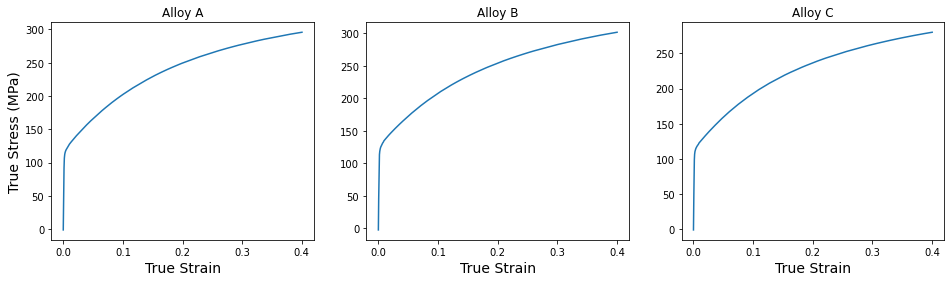

In [5]:
plt.rcParams['figure.figsize'] = 16, 4

plt.subplot(1,3,1);
plt.plot(exp_true_strainA,exp_true_stressA);
plt.title('Alloy A')
plt.ylabel('True Stress (MPa)',size=14)
plt.xlabel('True Strain',size=14)

plt.subplot(1,3,2);
plt.plot(exp_true_strainB,exp_true_stressB);
plt.title('Alloy B')
#plt.ylabel('True Stress (MPa)',size=14)
plt.xlabel('True Strain',size=14)

plt.subplot(1,3,3);
plt.plot(exp_true_strainC,exp_true_stressC);
plt.title('Alloy C')
#plt.ylabel('True Stress (MPa)',size=14)
plt.xlabel('True Strain',size=14)

## 2. Workflow Analysis: Check simulation and experimental data fitting

### May need to: 
* install matflow -> pip install matflow
* update matflow -> pip install -U matflow
* install version of matflow -> pip install matflow==0.2.15 (0.2.15 is an example version)

### Import paths:

In [6]:
uni1_path_A = r"C:\Users\Laura\Dropbox (The University of Manchester)\Matflow_Laura\Uniaxial_tensile_test_2021-07-16-094225"
uni2_path_A = r"C:\Users\Laura\Dropbox (The University of Manchester)\Matflow_Laura\Uniaxial_tensile_test_2021-07-17-162259"
uni1_path_B = r"C:\Users\Laura\Dropbox (The University of Manchester)\Matflow_Laura\Uniaxial_tensile_test_2021-07-16-095005"
uni2_path_B = r"C:\Users\Laura\Dropbox (The University of Manchester)\Matflow_Laura\Uniaxial_tensile_test_2021-07-17-162559"
uni1_path_C = r"C:\Users\Laura\Dropbox (The University of Manchester)\Matflow_Laura\Uniaxial_tensile_test_2021-07-16-095455"
uni2_path_C = r"C:\Users\Laura\Dropbox (The University of Manchester)\Matflow_Laura\Uniaxial_tensile_test_2021-07-17-162929"
ps1_path_A = r"C:\Users\Laura\Dropbox (The University of Manchester)\Matflow_Laura\Plane_strain_tension_2021-07-15-184146"
ps2_path_A = r"C:\Users\Laura\Dropbox (The University of Manchester)\Matflow_Laura\Plane_strain_tension_2021-07-17-163300"
ps1_path_B = r"C:\Users\Laura\Dropbox (The University of Manchester)\Matflow_Laura\Plane_strain_tension_2021-07-16-093057"
ps2_path_B = r"C:\Users\Laura\Dropbox (The University of Manchester)\Matflow_Laura\Plane_strain_tension_2021-07-17-163514"
ps1_path_C = r"C:\Users\Laura\Dropbox (The University of Manchester)\Matflow_Laura\Plane_strain_tension_2021-07-16-093451"
ps2_path_C = r"C:\Users\Laura\Dropbox (The University of Manchester)\Matflow_Laura\Plane_strain_tension_2021-07-17-163744"

### Extraction of the workflows:

In [7]:
workflow_uni1_A = load_workflow(uni1_path_A)
workflow_uni2_A = load_workflow(uni2_path_A)
workflow_uni1_B = load_workflow(uni1_path_B)
workflow_uni2_B = load_workflow(uni2_path_B)
workflow_uni1_C = load_workflow(uni1_path_C)
workflow_uni2_C = load_workflow(uni2_path_C)
workflow_ps1_A = load_workflow(ps1_path_A)
workflow_ps2_A = load_workflow(ps2_path_A)
workflow_ps1_B = load_workflow(ps1_path_B)
workflow_ps2_B = load_workflow(ps2_path_B)
workflow_ps1_C = load_workflow(ps1_path_C)
workflow_ps2_C = load_workflow(ps2_path_C)

Loading matflow config from C:\Users\Laura\.matflow\config.yml
Loading task schemas from 1 file(s)...OK!
Loading software definitions from 1 file(s)...OK!


### Extracting stress and strain data from the simulations:

In [8]:
uni1_stress_A = workflow_uni1_A.tasks[5].elements[0].outputs.volume_element_response['vol_avg_equivalent_stress']['data']
uni1_strain_A = workflow_uni1_A.tasks[5].elements[0].outputs.volume_element_response['vol_avg_equivalent_strain']['data']
uni2_stress_A = workflow_uni2_A.tasks[5].elements[0].outputs.volume_element_response['vol_avg_equivalent_stress']['data']
uni2_strain_A = workflow_uni2_A.tasks[5].elements[0].outputs.volume_element_response['vol_avg_equivalent_strain']['data']

uni1_stress_B = workflow_uni1_B.tasks[5].elements[0].outputs.volume_element_response['vol_avg_equivalent_stress']['data']
uni1_strain_B = workflow_uni1_B.tasks[5].elements[0].outputs.volume_element_response['vol_avg_equivalent_strain']['data']
uni2_stress_B = workflow_uni2_B.tasks[5].elements[0].outputs.volume_element_response['vol_avg_equivalent_stress']['data']
uni2_strain_B = workflow_uni2_B.tasks[5].elements[0].outputs.volume_element_response['vol_avg_equivalent_strain']['data']

uni1_stress_C = workflow_uni1_C.tasks[5].elements[0].outputs.volume_element_response['vol_avg_equivalent_stress']['data']
uni1_strain_C = workflow_uni1_C.tasks[5].elements[0].outputs.volume_element_response['vol_avg_equivalent_strain']['data']
uni2_stress_C = workflow_uni2_C.tasks[5].elements[0].outputs.volume_element_response['vol_avg_equivalent_stress']['data']
uni2_strain_C = workflow_uni2_C.tasks[5].elements[0].outputs.volume_element_response['vol_avg_equivalent_strain']['data']

ps1_stress_A = (workflow_ps1_A.tasks[5].elements[0].outputs.volume_element_response['vol_avg_equivalent_stress']['data'])
ps1_strain_A = (workflow_ps1_A.tasks[5].elements[0].outputs.volume_element_response['vol_avg_equivalent_strain']['data'])
ps2_stress_A = (workflow_ps2_A.tasks[5].elements[0].outputs.volume_element_response['vol_avg_equivalent_stress']['data'])
ps2_strain_A = (workflow_ps2_A.tasks[5].elements[0].outputs.volume_element_response['vol_avg_equivalent_strain']['data'])

ps1_stress_B = (workflow_ps1_B.tasks[5].elements[0].outputs.volume_element_response['vol_avg_equivalent_stress']['data'])
ps1_strain_B = (workflow_ps1_B.tasks[5].elements[0].outputs.volume_element_response['vol_avg_equivalent_strain']['data'])
ps2_stress_B = (workflow_ps2_B.tasks[5].elements[0].outputs.volume_element_response['vol_avg_equivalent_stress']['data'])
ps2_strain_B = (workflow_ps2_B.tasks[5].elements[0].outputs.volume_element_response['vol_avg_equivalent_strain']['data'])

ps1_stress_C = (workflow_ps1_C.tasks[5].elements[0].outputs.volume_element_response['vol_avg_equivalent_stress']['data'])
ps1_strain_C = (workflow_ps1_C.tasks[5].elements[0].outputs.volume_element_response['vol_avg_equivalent_strain']['data'])
ps2_stress_C = (workflow_ps2_C.tasks[5].elements[0].outputs.volume_element_response['vol_avg_equivalent_stress']['data'])
ps2_strain_C = (workflow_ps2_C.tasks[5].elements[0].outputs.volume_element_response['vol_avg_equivalent_strain']['data'])

### Calibration curves and uniaxial and plane strain tension simulations curves: Alloy A, B and C comparison

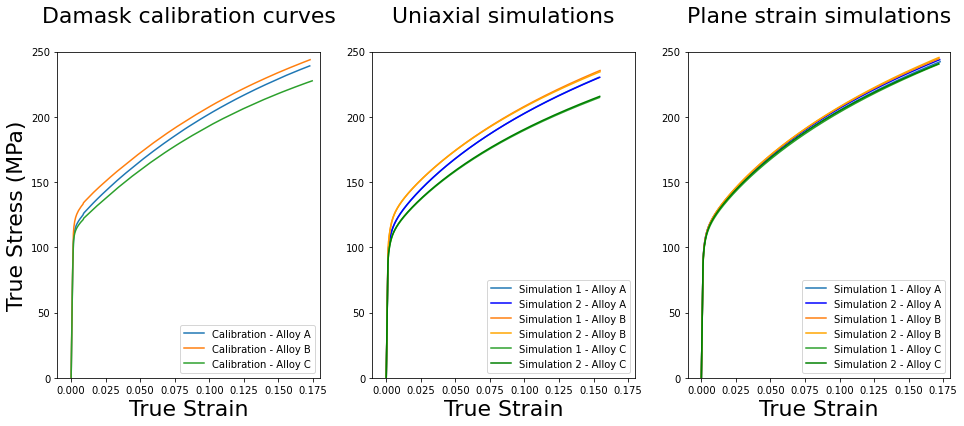

In [9]:
plt.rcParams['figure.figsize'] = 16, 6

plt.subplot(1,3,1);
plt.plot(exp_true_strainA[0:850],exp_true_stressA[0:850],label='Calibration - Alloy A');
plt.plot(exp_true_strainB[0:850],exp_true_stressB[0:850],label='Calibration - Alloy B');
plt.plot(exp_true_strainC[0:850],exp_true_stressC[0:850],label='Calibration - Alloy C');
plt.title('Damask calibration curves\n', fontsize=22)
plt.ylabel('True Stress (MPa)',size=22)
plt.xlabel('True Strain',size=22)
plt.legend(loc='lower right')
plt.xlim([-0.01, 0.18])
plt.ylim([0, 250])

plt.subplot(1,3,2);
plt.plot(uni1_strain_A,uni1_stress_A/1e6,label='Simulation 1 - Alloy A')
plt.plot(uni2_strain_A,uni2_stress_A/1e6,label='Simulation 2 - Alloy A', color='blue')
plt.plot(uni1_strain_B,uni1_stress_B/1e6,label='Simulation 1 - Alloy B')
plt.plot(uni2_strain_B,uni2_stress_B/1e6,label='Simulation 2 - Alloy B', color='orange')
plt.plot(uni1_strain_C,uni1_stress_C/1e6,label='Simulation 1 - Alloy C')
plt.plot(uni2_strain_C,uni2_stress_C/1e6,label='Simulation 2 - Alloy C', color='green')
plt.title('Uniaxial simulations\n', fontsize=22)
#plt.ylabel('True Stress (MPa)',size=22)
plt.xlabel('True Strain',size=22)
plt.legend(loc='lower right')
plt.xlim([-0.01, 0.18])
plt.ylim([0, 250])

plt.subplot(1,3,3);
plt.plot(ps1_strain_A[0:800],ps1_stress_A[0:800]/1e6,label='Simulation 1 - Alloy A')
plt.plot(ps2_strain_A[0:800],ps2_stress_A[0:800]/1e6,label='Simulation 2 - Alloy A', color='blue')
plt.plot(ps1_strain_B[0:800],ps1_stress_B[0:800]/1e6,label='Simulation 1 - Alloy B')
plt.plot(ps2_strain_B[0:800],ps2_stress_B[0:800]/1e6,label='Simulation 2 - Alloy B', color='orange')
plt.plot(ps1_strain_C[0:800],ps1_stress_C[0:800]/1e6,label='Simulation 1 - Alloy C')
plt.plot(ps2_strain_C[0:800],ps2_stress_C[0:800]/1e6,label='Simulation 2 - Alloy C', color='green')
plt.title('Plane strain simulations\n', fontsize=22)
#plt.ylabel('True Stress (MPa)',size=22)
plt.xlabel('True Strain',size=22)
plt.legend(loc='lower right')
plt.xlim([-0.01, 0.18])
plt.ylim([0, 250])

plt.savefig(r"C:\Users\Laura\Dropbox (The University of Manchester)\Mini-project\Experiments\Results\Pictures\calibration_comparison.png")

### Alloys A, B and C stress-strain curves: Calibration, uniaxial tension and plane strain tension comparison

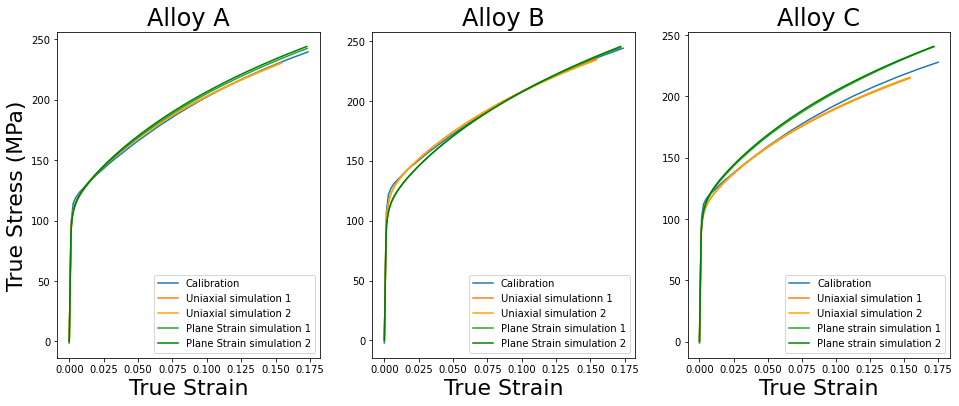

In [10]:
plt.rcParams['figure.figsize'] = 16, 6

plt.subplot(1,3,1);
plt.rcParams['figure.figsize'] = 10, 8
plt.plot(exp_true_strainA[2:900:50],np.array(exp_true_stressA[2:900:50]),label='Calibration')
plt.plot(uni1_strain_A,uni1_stress_A/1e6,label='Uniaxial simulation 1')
plt.plot(uni2_strain_A,uni2_stress_A/1e6,label='Uniaxial simulation 2',color='orange')
plt.plot(ps1_strain_A,ps1_stress_A/1e6,label='Plane Strain simulation 1')
plt.plot(ps2_strain_A,ps2_stress_A/1e6,label='Plane Strain simulation 2',color='green')
plt.title('Alloy A', fontsize=24)
plt.ylabel('True Stress (MPa)',size=22)
plt.xlabel('True Strain',size=22)
plt.legend()

plt.subplot(1,3,2);
plt.plot(exp_true_strainB[2:900:50],np.array(exp_true_stressB[2:900:50]),label='Calibration')
plt.plot(uni1_strain_B,uni1_stress_B/1e6,label='Uniaxial simulationn 1')
plt.plot(uni2_strain_B,uni2_stress_B/1e6,label='Uniaxial simulation 2',color='orange')
plt.plot(ps1_strain_B,ps1_stress_B/1e6,label='Plane Strain simulation 1')
plt.plot(ps1_strain_B,ps2_stress_B/1e6,label='Plane Strain simulation 2',color='green')
plt.title('Alloy B', fontsize=24)
#plt.ylabel('True Stress (MPa)',size=14)
plt.xlabel('True Strain',size=22)
plt.legend()

plt.subplot(1,3,3);
plt.plot(exp_true_strainC[2:900:50],np.array(exp_true_stressC[2:900:50]),label='Calibration')
plt.plot(uni1_strain_C,uni1_stress_C/1e6,label='Uniaxial simulation 1')
plt.plot(uni2_strain_C,uni2_stress_C/1e6,label='Uniaxial simulation 2',color='orange')
plt.plot(ps1_strain_C,ps1_stress_C/1e6,label='Plane strain simulation 1')
plt.plot(ps2_strain_C,ps2_stress_C/1e6,label='Plane strain simulation 2',color='green')
plt.title('Alloy C', fontsize=24)
#plt.ylabel('True Stress (MPa)',size=14)
plt.xlabel('True Strain',size=22)
plt.legend()

plt.savefig(r"C:\Users\Laura\Dropbox (The University of Manchester)\Mini-project\Experiments\Results\Pictures\calibration.png")